### 非監督式學習 K-means 分群
#### K-means 演算法
透過分群分類演算法我們能夠將多種維度的資料進行分類。K-means 演算法的概念很簡單也非常容易實作，僅一般加減乘除就好不需複雜的計算公式。

1. 初始化: 指定 K 個分群，並隨機挑選 K 個資料點的值當作群組中心值
2. 分配資料點: 將每個資料點設為距離最近的中心
3. 計算平均值: 重新計算每個分群的中心點

動圖參考程式 : https://stackoverflow.com/questions/43770847/play-an-animated-gif-in-python-with-tkinter

In [9]:
import tkinter as tk
from PIL import Image, ImageTk
from itertools import count

class ImageLabel(tk.Label):
    """a label that displays images, and plays them if they are gifs"""
    def load(self, im):
        if isinstance(im, str):
            im = Image.open(im)
        self.loc = 0
        self.frames = []

        try:
            for i in count(1):
                self.frames.append(ImageTk.PhotoImage(im.copy()))
                im.seek(i)
        except EOFError:
            pass

        try:
            self.delay = im.info['duration']
        except:
            self.delay = 100

        if len(self.frames) == 1:
            self.config(image=self.frames[0])
        else:
            self.next_frame()

    def unload(self):
        self.config(image="")
        self.frames = None

    def next_frame(self):
        if self.frames:
            self.loc += 1
            self.loc %= len(self.frames)
            self.config(image=self.frames[self.loc])
            self.after(self.delay, self.next_frame)

root = tk.Tk()
lbl = ImageLabel(root)
lbl.pack()
lbl.load('D:/github/圖片/img6-2.gif')
root.mainloop()

#### 載入相關套件

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

#### 載入資料集

In [2]:
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
X = df_data.drop(labels=['Species'],axis=1).values # 移除Species並取得剩下欄位資料
y = df_data['Species']

#### K-Means
K-means 演算法在 Sklearn 套件中已經幫我們封裝好了，使用者只要呼叫 API 即可將分群分類演算法快速實作。

Parameters :

*   n_cluster : K的大小，也就是分群的類別數量。
*   random_state : 亂數種子，設定常數能夠保證每次分群結果都一樣。
*   n_init : 預設為10次隨機初始化，選擇效果最好的一種來作為模型。
*   max_iter : 迭代次數，預設為300代。

Attributes :

*   inertia_ : inertia_：float，每個點到其他叢集的質心的距離之和。
*   cluster_centers_： 特徵的中心點 [n_clusters, n_features]。

Methods :

*   fit : K個集群分類模型訓練。
*   predict : 預測並回傳類別。
*   fit_predict : 先呼叫fit()做集群分類，之後在呼叫predict()預測最終類別並回傳輸出。
*   transform : 回傳的陣列每一行是每一個樣本到kmeans中各個中心點的L2(歐幾里得)距離。
*   fit_transform : 先呼叫fit()再執行transform()。

In [3]:
from sklearn.cluster import KMeans

kmeansModel = KMeans(n_clusters=3, random_state=46)
clusters_pred = kmeansModel.fit_predict(X) #分類結果

#### 評估分群結果
使用者設定 K 個分群後，該演算法快速的找到 K 個中心點並完成分群分類。擬合好模型後我們可以計算各個樣本到該群的中心點的距離之平方和，用來評估集群的成效，其 inertia 越大代表越差。

In [4]:
kmeansModel.inertia_

78.85144142614602

若要查看各群集的中心點，可以參考以下程式碼。

In [5]:
kmeansModel.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

#### 真實結果

c:\Users\bluesky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


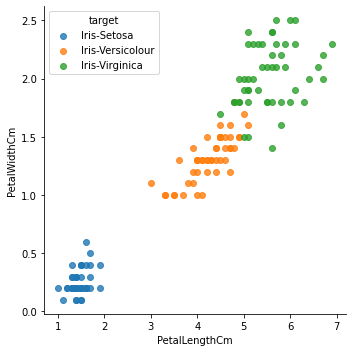

In [7]:
sns.lmplot("PetalLengthCm", "PetalWidthCm", hue='Species', data=df_data, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.show()

#### K-mean 後預測結果

c:\Users\bluesky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


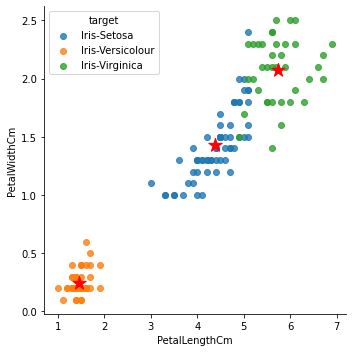

In [8]:
df_data['Predict']=clusters_pred
sns.lmplot("PetalLengthCm", "PetalWidthCm", data=df_data, hue="Predict", fit_reg=False, legend=False) #放入data所有位置
plt.scatter(kmeansModel.cluster_centers_[:, 2], kmeansModel.cluster_centers_[:, 3], s=200,c="r",marker='*') #畫星號
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica']) #放入label
plt.show()



c:\Users\bluesky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


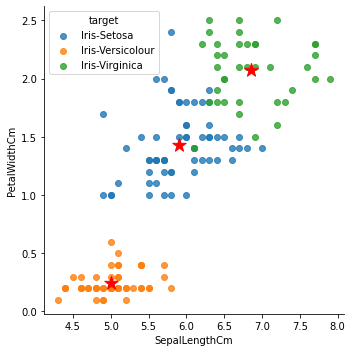

In [9]:
df_data['Predict']=clusters_pred
sns.lmplot("SepalLengthCm", "PetalWidthCm", data=df_data, hue="Predict", fit_reg=False, legend=False) #放入data所有位置
plt.scatter(kmeansModel.cluster_centers_[:, 0], kmeansModel.cluster_centers_[:, 3], s=200,c="r",marker='*') #畫星號
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica']) #放入label
plt.show()


#### 使用inertia做評估

In [10]:
# k = 1~9 做9次kmeans, 並將每次結果的inertia收集在一個list裡
kmeans_list = [KMeans(n_clusters=k, random_state=46).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_list]

In [14]:
kmeans_list

[KMeans(n_clusters=1, random_state=46),
 KMeans(n_clusters=2, random_state=46),
 KMeans(n_clusters=3, random_state=46),
 KMeans(n_clusters=4, random_state=46),
 KMeans(n_clusters=5, random_state=46),
 KMeans(n_clusters=6, random_state=46),
 KMeans(n_clusters=7, random_state=46),
 KMeans(random_state=46),
 KMeans(n_clusters=9, random_state=46)]

如圖，當K值越來越大，inertia會隨之越來越小，(但k=n時理論上inertia會減為0, 因此實際上不能選inertia最小的那個k) 一般是取elbow point, 即inertia迅速下降轉為平緩的那個點

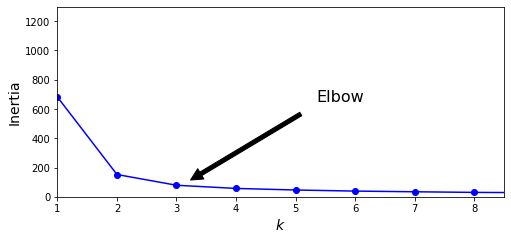

In [11]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])

plt.show()

另外一個方法是用silhouette scores 去評估.\
 The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). Silhouette Coefficient 越大代表分群效果越好\
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

In [12]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_list[1:]]

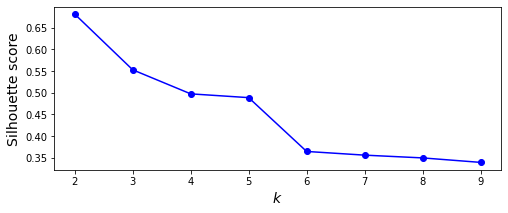

In [20]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()